## Starter Code

In [1]:
# From Geron 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# Standard library
import random

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"    

In [2]:
# mnist_loader.py
# I removed unnecessary code in order to simplify this file as much as possible.

# Standard library
import pickle
import gzip

# Third-party libraries
import numpy as np

def load_data():    
    f = gzip.open('mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (training_data, validation_data, test_data)


## Best Solution

In [3]:
# Load data. validation_data is not used...it should probably be combined with the training_data in order 
# to improve training.

training_data, validation_data, test_data = load_data()

training_data_X = training_data[0]
training_data_y = training_data[1]

test_data_X = test_data[0]
test_data_y = test_data[1]

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [5]:
epochs = 100
mini_batch_size = 20
eta = 0.3

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=epochs, batch_size=mini_batch_size, learning_rate_init=eta, activation='logistic', solver='sgd')
mlp.fit(training_data_X, training_data_y)

cross_val_score(mlp, test_data_X, test_data_y, cv=3, scoring="accuracy")

array([0.92810066, 0.94779478, 0.95434064])

In [6]:
predictions = cross_val_predict(mlp, test_data_X, test_data_y, cv=3)
conf_mx = confusion_matrix(test_data_y, predictions)
conf_mx

array([[ 958,    0,    0,    3,    0,    5,    5,    4,    4,    1],
       [   0, 1113,    4,    4,    0,    3,    3,    3,    5,    0],
       [  10,    0,  961,    5,   19,    1,    6,   16,   14,    0],
       [   3,    0,   12,  927,    0,   29,    0,    9,   19,   11],
       [   1,    1,    3,    0,  932,    2,    7,    2,    6,   28],
       [  10,    5,    1,   17,    9,  812,   18,    3,    9,    8],
       [  10,    3,    7,    1,    9,    7,  914,    1,    6,    0],
       [   2,    6,   21,    1,    9,    1,    1,  974,    1,   12],
       [   6,    4,   12,    8,    6,   10,    7,    5,  913,    3],
       [   6,    5,    1,   13,   38,   11,    1,   17,    2,  915]],
      dtype=int64)

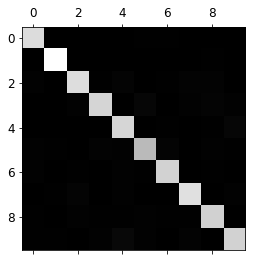

In [7]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [8]:
# Let's print precision and recall for both models

from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_data_y, predictions, average='macro')
recall = recall_score(test_data_y, predictions, average='macro')

print("Precision: ",precision)
print("Recall: ",recall)

Precision:  0.941223703996467
Recall:  0.9412340412952964
